In [1]:
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

## Задание 1

1. Смоделировать 4 выборки объемом 1000 из разных законов распределения: нормальное, экспоненциальное, равномерное и любой 
другой закон распределения на выбор.

In [2]:
normal_distribut = stats.norm(scale=1)
normal = normal_distribut.rvs(size=1000)

expo_distribut = stats.expon(scale=1)
expo = expo_distribut.rvs(size=1000)

unif_distribut = stats.uniform(scale=1)
unif = unif_distribut.rvs(size=1000)

logg_distribut = stats.lognorm(s=0.99,scale=1)
logg = logg_distribut.rvs(size=1000)

2. Для каждой выборки посчитать описательные характеристики (минимум и максимум, мат. ожидание, дисперсия, стандартное 
отклонение, квантили уровней 0.25 и 0.75, размах, медиана, коэффициенты асимметрии и эксцесса). 

In [3]:
def calc_character(num):
    min_value = np.min(num) #minimum
    max_value = np.max(num) #maximum
    avg_value = num.mean() #мат ожидание
    var_value = num.var() #дисперсия
    std_value = num.std() #среднее квадр откл
    quantiles = np.quantile(num, [0.25, 0.75]) #
    q75_value = quantiles[1] #0,75 квантиль
    q25_value = quantiles[0] #0,25 квантиль
    rng_value = np.ptp(num) #размах
    med_value = np.median(num) #медиана
    assim_value = stats.skew(num) #коэф ассиметрии
    krt_value = stats.kurtosis(num) #эксцесс
    
    return{'min':min_value, #minimum
           'max':max_value, #maximum
           'avg':avg_value, #мат ожидание
           'var':var_value, #дисперсия
           'std':std_value, #среднее квадр откл
           'q25':q25_value, #0,75 квантиль
           'q75':q75_value, #0,25 квантиль
           'rng':rng_value, #размах
           'med':med_value, #медиана
           'assim':assim_value, #коэф ассиметрии
           'krt':krt_value} #эксцесс
    

In [4]:
calc_character(normal)

{'min': -2.9370407174662376,
 'max': 3.934516870629156,
 'avg': 0.03211211124455723,
 'var': 0.9803268655794721,
 'std': 0.990114571945829,
 'q25': -0.6275835371380822,
 'q75': 0.6641176988464509,
 'rng': 6.871557588095394,
 'med': 0.011609738210346856,
 'assim': 0.0667228486661677,
 'krt': 0.038693519221733474}

In [5]:
calc_character(expo)

{'min': 0.0005367037721173602,
 'max': 6.5905950175213,
 'avg': 0.920636673046009,
 'var': 0.8527726938656297,
 'std': 0.9234569258312104,
 'q25': 0.25845592381104254,
 'q75': 1.2741356078864072,
 'rng': 6.590058313749183,
 'med': 0.6527323762871801,
 'assim': 2.0426236619124363,
 'krt': 5.833883985205652}

In [6]:
calc_character(unif)

{'min': 0.0021435189205557537,
 'max': 0.998493065953382,
 'avg': 0.49847751451057926,
 'var': 0.08346892766430539,
 'std': 0.2889098954073837,
 'q25': 0.24349211135218787,
 'q75': 0.7504397391588752,
 'rng': 0.9963495470328263,
 'med': 0.4968223210146975,
 'assim': -0.0004524006579582949,
 'krt': -1.1827528621349448}

In [7]:
calc_character(logg)

{'min': 0.044367132518765645,
 'max': 19.654920176678413,
 'avg': 1.639109377388258,
 'var': 3.99641311971786,
 'std': 1.999103078812561,
 'q25': 0.5022619731253168,
 'q75': 2.0471757399587736,
 'rng': 19.610553044159648,
 'med': 0.9711243174413842,
 'assim': 3.792000078464995,
 'krt': 22.03310286909798}

3. Визуализировать полученные выборки, используя гистограммы и диаграммы «Ящик с усами», построить эмпирические функцию и 
плотность распределения. 

In [8]:
def graph(x, pdf, num, ecdf, name):
    plt.figure(figsize=(12,10))
    #Эмпирическая функция распределения
    plt.subplot(221)
    plt.step(ecdf.x, ecdf.y, label='F_n(x)')
    plt.title(f"Эмпирическая функция {name} распределение")
    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    plt.grid()
    # плотность распределения
    plt.subplot(222)
    plt.plot(x, pdf, label='f(x)')
    plt.title(f"Плотность {name} распределение")
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.grid()
    # Гистограмма
    plt.subplot(223)
    plt.hist(num)
    plt.title(f"Гистограмма {name} распределение")
    plt.ylabel('$k$')
    plt.xlabel('$x$')
    plt.grid()
    # Ящик с усами
    plt.subplot(224)
    plt.boxplot(num)
    plt.title(f"диаграмма 'Ящик с усами' {name} распределение")
    plt.ylabel('$x$')
    plt.grid()

    plt.show()

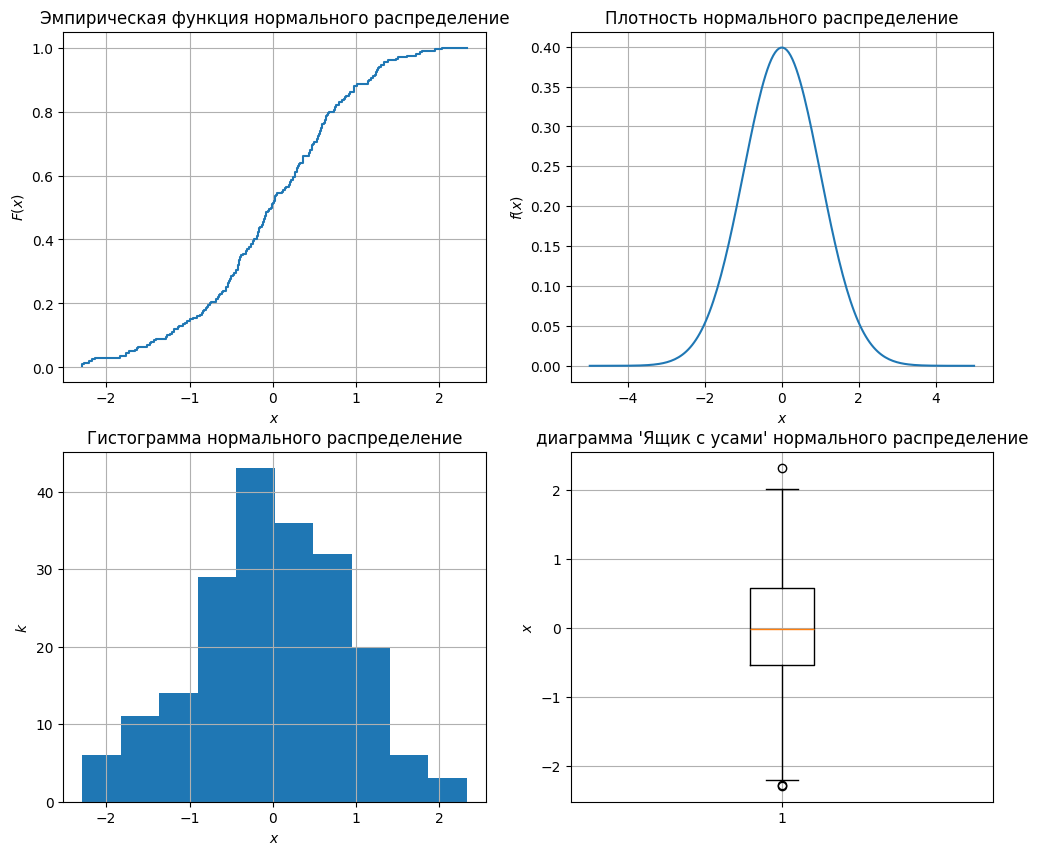

In [9]:
x = np.linspace(-5,5,200)
pdf = normal_distribut.pdf(x)
num = normal_distribut.rvs(size=200)
ecdf = ECDF(num)
name = 'нормального'
graph(x, pdf, num,ecdf,name)

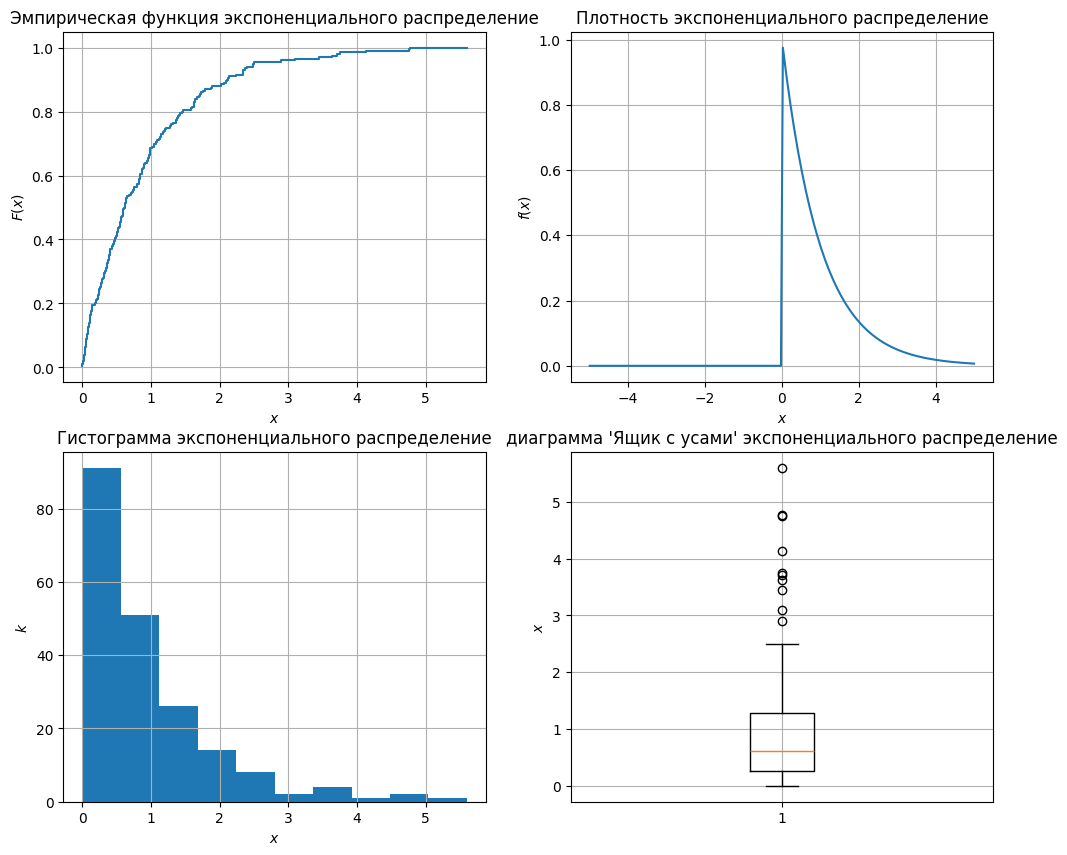

In [10]:
x = np.linspace(-5,5,200)
pdf = expo_distribut.pdf(x)
num = expo_distribut.rvs(size=200)
ecdf = ECDF(num)
name = 'экспоненциального'
graph(x, pdf, num,ecdf,name)

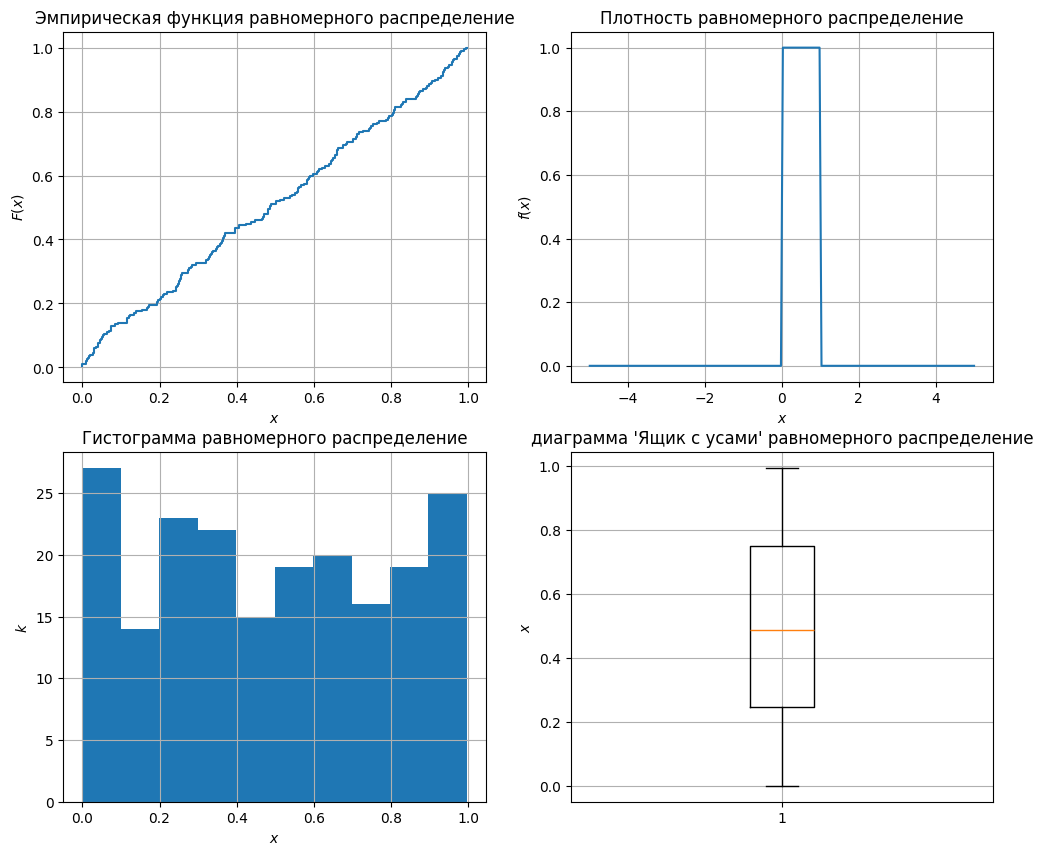

In [11]:
x = np.linspace(-5,5,200)
pdf = unif_distribut.pdf(x)
num = unif_distribut.rvs(size=200)
ecdf = ECDF(num)
name = 'равномерного'
graph(x, pdf, num,ecdf,name)

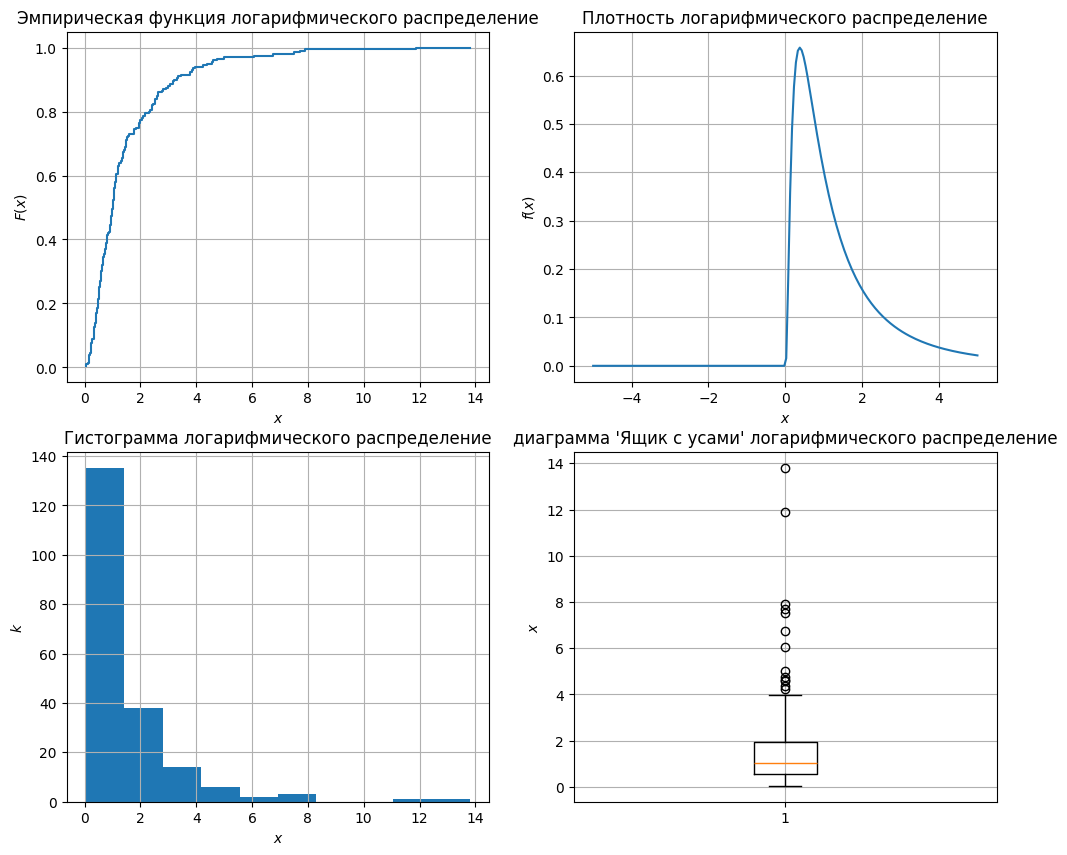

In [12]:
x = np.linspace(-5,5,200)
pdf = logg_distribut.pdf(x)
num = logg_distribut.rvs(size=200)
ecdf = ECDF(num)
name = 'логарифмического'
graph(x, pdf, num,ecdf,name)

## Задание 2

1. Выбрать параметры для нормального распределения. 
2. По 1000 раз смоделировать с выбранными параметрами выборки объема: 10, 50, 100, 1000. 

In [13]:
normal_dist = stats.norm(loc=5, scale=10)

In [14]:
normal_10 = normal_dist.rvs(size=(1000, 10))
mean_10 = [normal.mean() for normal in normal_10]

In [15]:
normal_50 = normal_dist.rvs(size=(1000, 50))
mean_50 = [normal.mean() for normal in normal_50]

In [16]:
normal_100 = normal_dist.rvs(size=(1000, 100))
mean_100 = [normal.mean() for normal in normal_100]

In [17]:
normal_1000 = normal_dist.rvs(size=(1000, 1000))
mean_1000 = [normal.mean() for normal in normal_1000]

3. Построить гистограмму средних. 

In [18]:
def gist(mean, rang):
    plt.figure(figsize=(6,4))
    plt.hist(mean)
    plt.title(f"Гистограмма средний выборок по {rang} элементов")
    plt.ylabel('$k$')
    plt.xlabel('$x$')
    plt.grid()
    plt.show()

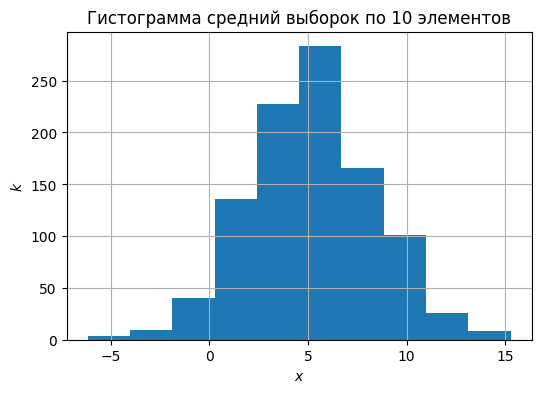

In [19]:
gist(mean_10, 10)

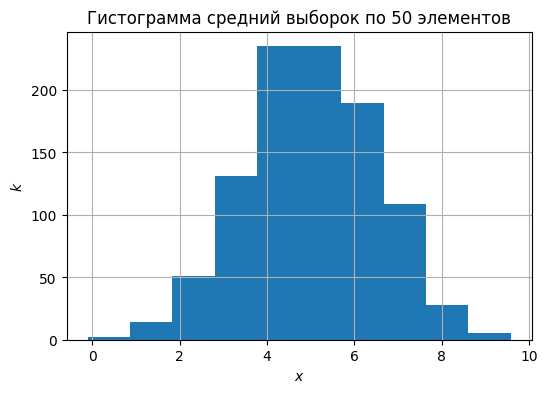

In [20]:
gist(mean_50, 50)

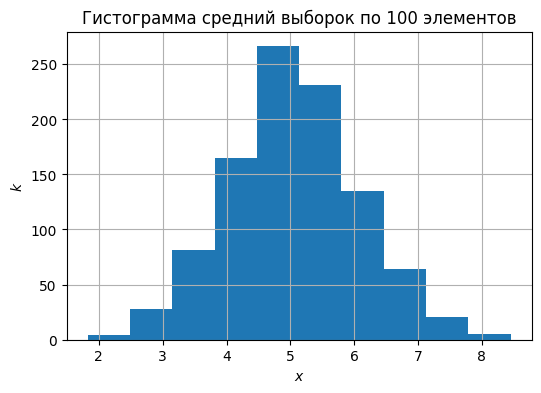

In [21]:
gist(mean_100, 100)

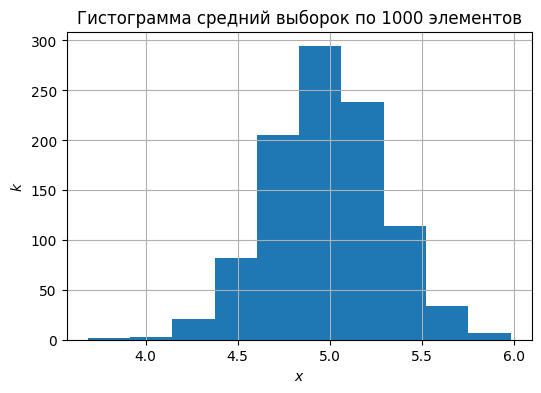

In [22]:
gist(mean_1000, 1000)

4. Посчитать выборочные среднее, стандартное отклонение и коэффициент вариации для каждого объема выборки.

In [23]:
mean = np.mean(mean_10)
std = np.std(mean_10)
cv = std / mean
print('Для выборки объемом 10:\n', mean, std, cv)

Для выборки объемом 10:
 5.1871787240083345 3.1711085785364306 0.6113359009319023


In [24]:
mean = np.mean(mean_50)
std = np.std(mean_50)
cv = std / mean
print('Для выборки объемом 50:\n', mean, std, cv)

Для выборки объемом 50:
 5.02049405696171 1.478878719814281 0.29456836379749946


In [25]:
mean = np.mean(mean_100)
std = np.std(mean_100)
cv = std / mean
print('Для выборки объемом 100:\n', mean, std, cv)

Для выборки объемом 100:
 5.04765302242952 1.0244793559995675 0.20296152517759006


In [26]:
mean = np.mean(mean_1000)
std = np.std(mean_1000)
cv = std / mean
print('Для выборки объемом 1000:\n', mean, std, cv)

Для выборки объемом 1000:
 4.985582953639274 0.31322934864665175 0.0628270257579421


## Задание 3

1. Сгенерируйте выборку из стандартного нормального распределения. 
2. Для каждого 𝑛 постройте эмпирическую функцию распределения 𝐹𝑛 и посчитайте значение статистики
$$𝐷_𝑛 = sup|𝐹_𝑛(𝑥) − 𝐹(𝑥)|$$

In [27]:
normal_dist = stats.norm(loc=0, scale=3)
normal = normal_dist.rvs(size=1000)

In [28]:
def empirical_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x,y

In [29]:
x_empirical, y_empirical = empirical_cdf(normal)
x_teor = np.linspace(min(normal), max(normal), 1000)
y_teor = stats.norm.cdf(x_teor, loc=0, scale=1)
D_n = np.max(np.abs(y_empirical) - stats.norm.cdf(x_empirical))

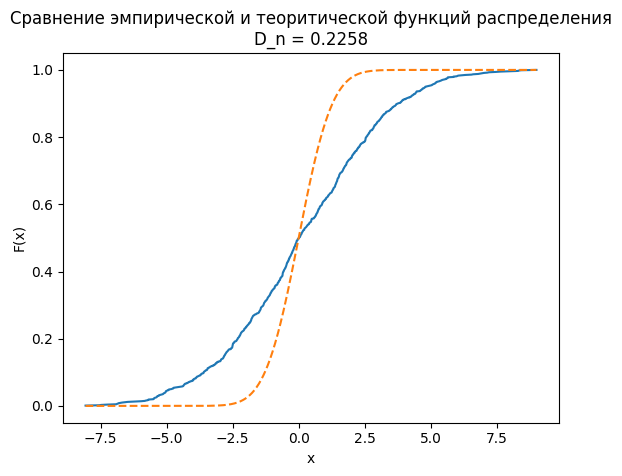

In [30]:
plt.plot(x_empirical, y_empirical, label='Эмпирическая функция распределения')
plt.plot(x_teor, y_teor, label='Теоритическая функция распределения', linestyle='--')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title(f"Сравнение эмпирической и теоритической функций распределения\nD_n = {D_n:.4f}")
plt.show()